# Python Programming Crash Course
# How to paint Pandas

<br>
<div>
<img src="data/Python-logo-notext.svg" width="200"/>
</div>

Now, since we know how to store, filter, manipulate and calculate with <font color="green">**DataFrames**</font>, it's time for the artwork!

<br>
<div>
<img src="data/Pandas.jpeg" width="400"/>
</div>

In <font color="green">**Python**</font>, there are several <font color="green">**libraries**</font> for data visualization. The most prominent ones being

 - <font color="green">**matplotlib**</font>
 - <font color="green">**seaborn**</font>
 - plotnine
 - plotly
 
Moreover, you can do some visualizations with <font color="green">**pandas**</font> directly, more or less, as <font color="green">**pandas**</font> incorporates the <font color="green">**matplotlib**</font> library.
Let's see how that works.

## Data Visualization using <font color="green">**pandas**</font>


<font color="green">**pandas**</font> offers conveniently a **`plot()`** <font color="green">**function**</font> , that is a class <font color="green">**method**</font>  of both <font color="green">**DataFrame**</font> and <font color="green">**Series**</font>.

In [1]:
# import
import pandas as pd
import matplotlib as plt
from IPython.display import display

In [2]:
# get some data
df_iris = pd.read_csv("data/iris.csv")
myframe = pd.read_csv("montys.csv")
myframe = myframe.fillna(0)
myframe

,First Name,Name,Year,Score,Movies,Director,Writer,Awards,Birthday,Country
0,John,Cleese,1939,9.3,183,3.0,77,12,27-10-1939,England
1,Graham,Chapman,1941,8.8,29,0.0,53,1,08-01-1941,England
2,Eric,Idle,1943,9.0,87,11.0,45,2,29-03-1941,England
3,Terry,Gilliam,1940,9.2,33,19.0,31,29,22-11-1941,USA
4,Michael,Palin,1943,9.2,77,0.0,66,9,05-05-1941,England
5,Terry,Jones,1942,9.0,59,19.0,57,3,01-02-1941,Wales


<Axes: >

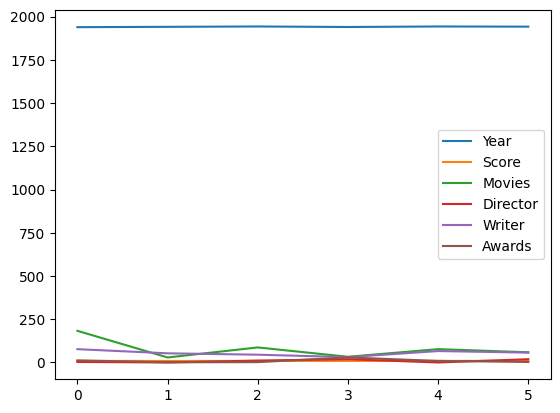

In [3]:
# just plot
myframe.plot()

**`plot()`** is a convenience <font color="green">**method**</font>  that, without any <font color="green">**parameters**</font>  plots line diagrams of all labeled colums, (provided they can be reasonably plottet).\
It makes use of <font color="green">**matplotlib**</font> which handles the actual <font color="green">**figure**</font>  generation behind the scenes. That means that every <font color="green">**figure**</font>  created by <font color="green">**pandas**</font> is a <font color="green">**matplotlib**</font> object!

Different columns will by default be depicted as different elements (in this case lines) of the <font color="green">**figure**</font> .

This <font color="green">**figure**</font>  is pretty basic, we can add more information. Also, plotting the year does not make much sense, since the large values of "Year" will squash the rest. Let's refine the <font color="green">**DataFrame**</font> a little and plot again:

In [4]:
# refine the dataframe
df = myframe[["Name", "Movies", "Director", "Writer", "Awards"]]  # select the columns to show
df.index = ["JC", "GC", "EI", "TG", "MP", "TJ"]  # set some non-numeric index values
df = df.rename_axis("Actor")  # set the Index name -> will be shown as x-axis label
df = df.rename_axis("Count", axis=1)  # set the columns Index name -> will show up as legend label

display(df)

Count,Name,Movies,Director,Writer,Awards
Actor,,,,,
JC,Cleese,183,3.0,77,12
GC,Chapman,29,0.0,53,1
EI,Idle,87,11.0,45,2
TG,Gilliam,33,19.0,31,29
MP,Palin,77,0.0,66,9
TJ,Jones,59,19.0,57,3


<Axes: xlabel='Actor'>

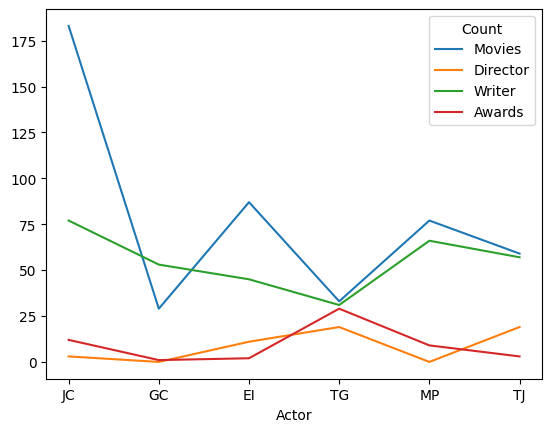

In [5]:
# plot again
df.plot()

We can also use plot on a <font color="green">**Series**</font>:

<class 'pandas.core.series.Series'>


<Axes: xlabel='Actor'>

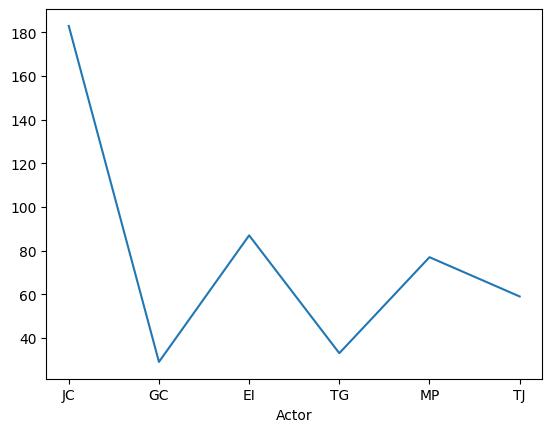

In [6]:
# get a Series from the DataFrame
movies = df["Movies"]
print(type(movies))
movies = movies.rename_axis("Actor")
movies.plot()

You can also specify directly, what you want to plot:

<Axes: xlabel='Actor'>

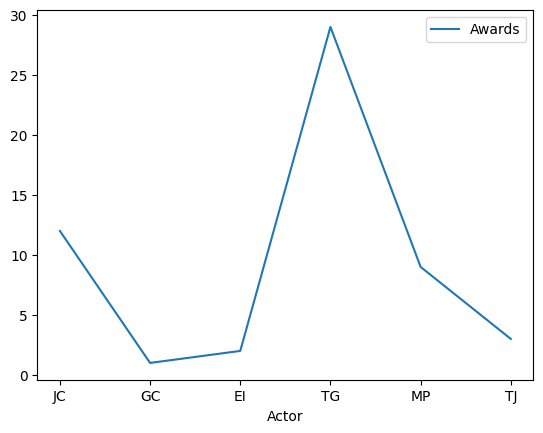

In [7]:
df.plot(y="Awards")  # plot the Awards

<Axes: xlabel='Name'>

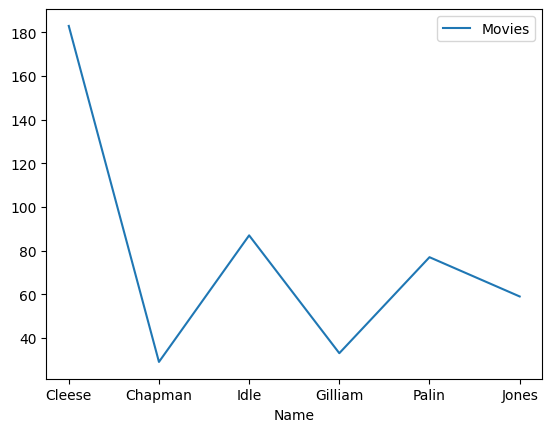

In [8]:
df.plot(x="Name", y="Movies")  # plot the movies versus the names of the actors

Line plots are useful to plot a development, e.g. gene expression over time.
But not so much in this case, since the Monty Pythons are independent of each other.

Luckily, **`plot()`** does all kinds of plots, we can just tell it, what `kind` we need.

With pandas you can currently do the following `kind` of plots:

- <font color="cyan">‘bar‘</font> or <font color="cyan">‘barh’</font> for bar plots
- <font color="cyan">‘hist’</font> for histogram
- <font color="cyan">‘box’</font> for boxplot
- <font color="cyan">‘kde’</font> or <font color="cyan">‘density’</font> for density plots
- <font color="cyan">‘area’</font> for area plots
- <font color="cyan">‘scatter’</font> for scatter plots
- <font color="cyan">‘hexbin’</font> for hexagonal bin plots
- <font color="cyan">‘pie’</font> for pie plots


<Axes: xlabel='Name'>

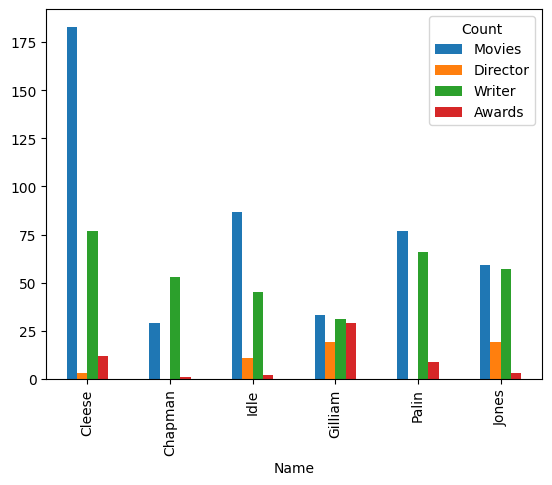

In [9]:
# do a bar chart
df.plot(x="Name", kind="bar")

<Axes: ylabel='Name'>

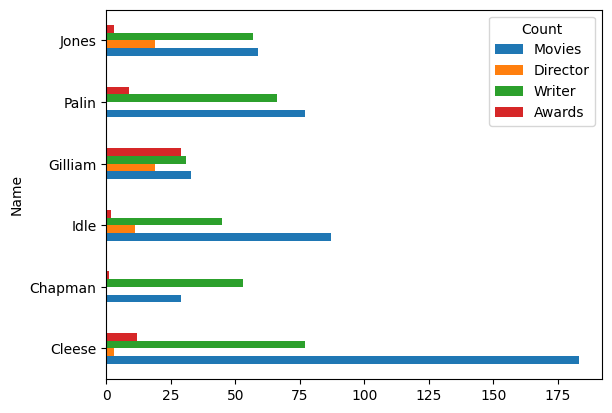

In [10]:
# or do a horizontal bar chart
df.plot(x="Name", kind="barh") 

<Axes: ylabel='Movies'>

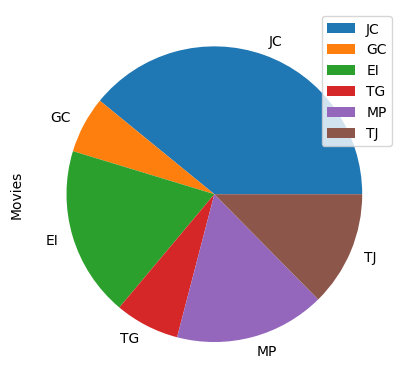

In [11]:
# Or even a pie chart
df.plot(y="Movies", kind="pie")

<Axes: ylabel='Movies'>

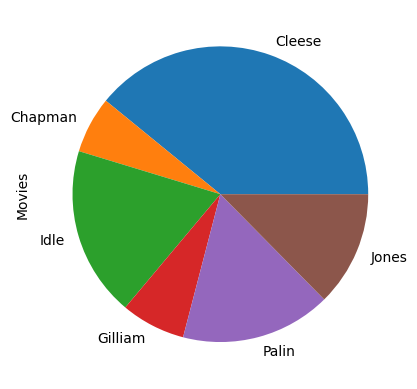

In [12]:
# make it nicer ... 
df.set_index("Name").plot(y="Movies", kind="pie", legend=False)

Lines, bars and pie charts, check! What if we need a scatter plot?\
It's just the same, but with scatter plots, we need to tell <font color="green">**pandas**</font>, which `x` we want to plot versus which `y`!

Assume we want to plot "Movies" versus "Awards":

<Axes: xlabel='Movies', ylabel='Awards'>

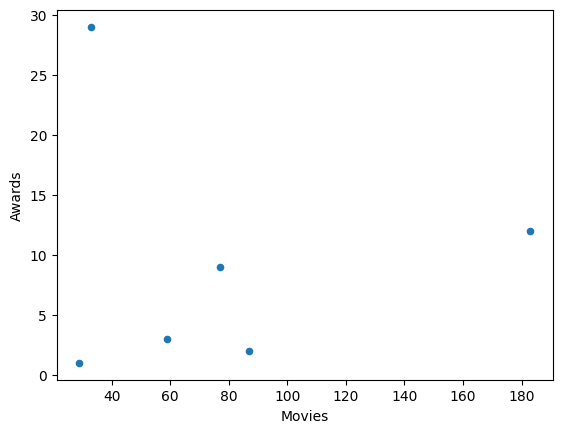

In [13]:
# a scatter plot... tell plot what is x and y!
df.plot(x="Movies", y="Awards",kind="scatter")  # you must specify x and y 

Now we can plot one variable versus another, e.g. to see, whether there might be a correlation.

If we wanted to get a glimpse of the descriptive statistics, we could do a box plot:

In [14]:
# take a look at the statistics again
display(df.describe())

Count,Movies,Director,Writer,Awards
count,6.000000,6.000000,6.000000,6.000000
mean,78.000000,8.666667,54.833333,9.333333
std,56.380848,8.959167,16.055113,10.557778
min,29.000000,0.000000,31.000000,1.000000
25%,39.500000,0.750000,47.000000,2.250000
50%,68.000000,7.000000,55.000000,6.000000
75%,84.500000,17.000000,63.750000,11.250000
max,183.000000,19.000000,77.000000,29.000000


<Axes: >

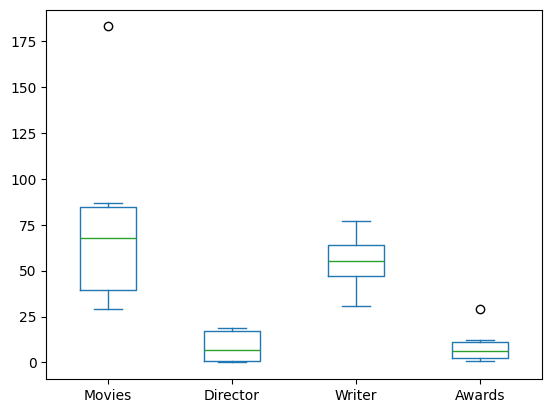

In [15]:
# do a box plot
df.plot(kind="box")

We can also do histograms:

In [16]:
# Get some more numbers to plot
df_melted = df.melt(id_vars="Name")  # let's stack all counts together
display(df_melted)

,Name,Count,value
0,Cleese,Movies,183.0
1,Chapman,Movies,29.0
2,Idle,Movies,87.0
3,Gilliam,Movies,33.0
4,Palin,Movies,77.0
5,Jones,Movies,59.0
6,Cleese,Director,3.0
7,Chapman,Director,0.0
8,Idle,Director,11.0
9,Gilliam,Director,19.0


<Axes: ylabel='Frequency'>

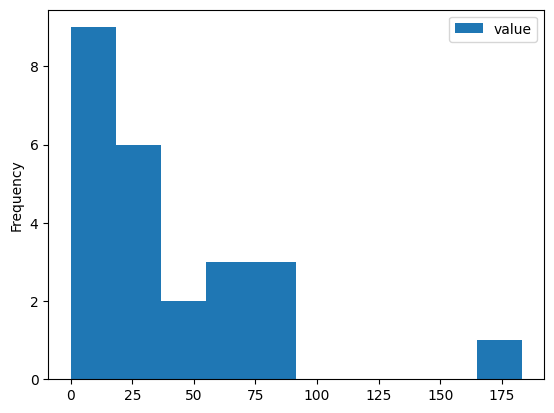

In [17]:
df_melted.plot(kind="hist")  # a histogram. This will plot the values versus frequency

<Axes: ylabel='Frequency'>

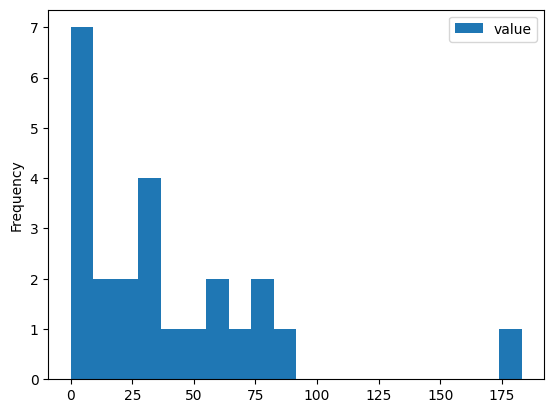

In [18]:
# you can usually tweak the plot by adding 
df_melted.plot(kind="hist", bins = 20)  # a histogram. This will plot the values versus frequency

In [19]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: ylabel='Frequency'>

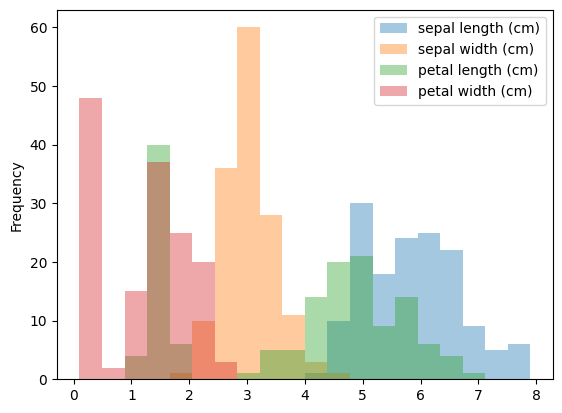

In [20]:
# plot the iris measurements as histogram
df_iris.plot(kind="hist", bins=20, alpha=.4)

<Axes: ylabel='Density'>

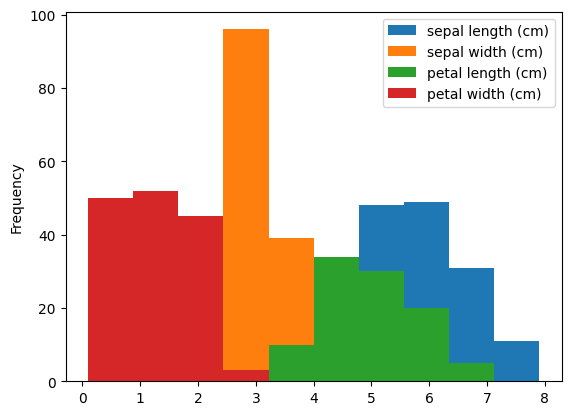

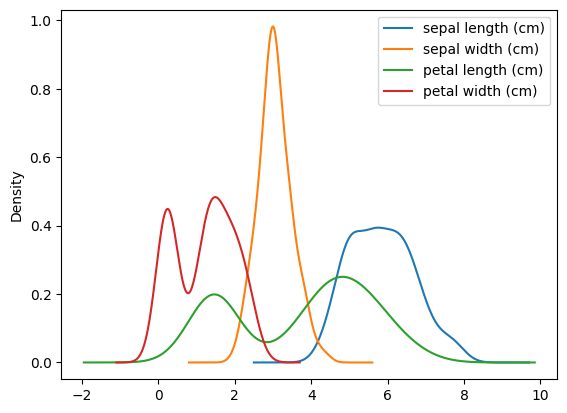

In [40]:
# kde
df_iris.plot(kind="hist")
df_iris.plot(kind="kde")

We can also plot `area` plots, That is, the are under the curve is colored. If you have multiple curves, they are stacked.

<Axes: xlabel='Name'>

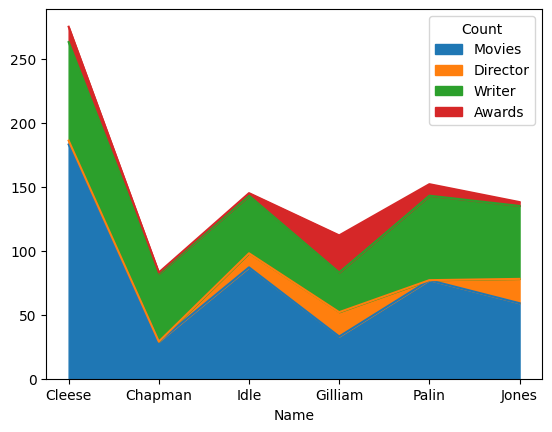

In [21]:
df.plot(kind="area", x="Name")

Instead of specifying the "kind" of plot, you can simply call the corresponding plot directly as a <font color="green">**function**</font> :

<Axes: xlabel='Name'>

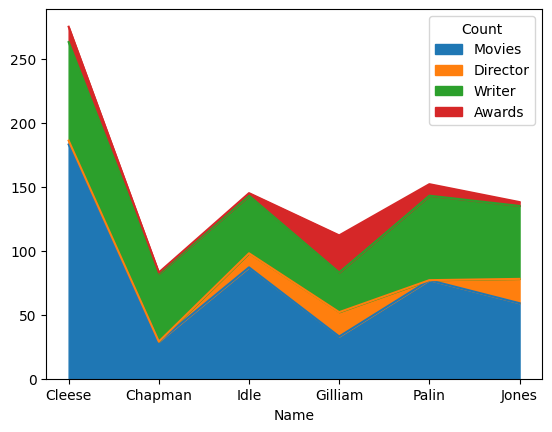

In [22]:
# area as a function  instead a parameter, works just the same
df.plot.area(x="Name")

<Axes: xlabel='Name'>

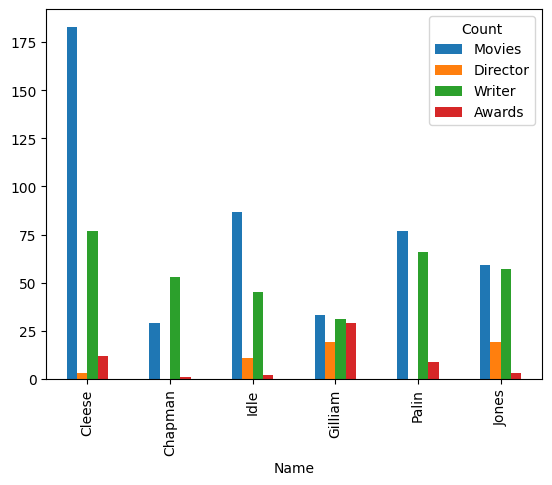

In [23]:
# or with a bar plot ... 
df.plot.bar(x="Name")  

What if we don't want to have the bars grouped together but instead want a `stacked` bar plot?\
As we have seen, different plots need (obviously) different informations and have different customization options.

Depending on the plot you are doing, the <font color="green">**function**</font>  you call, will take additional arguments.
You can tweak the plot in a huge variety of different ways.
We can do this again with additional <font color="green">**parameters**</font> , in this case `stacked=True`:

<Axes: xlabel='Name'>

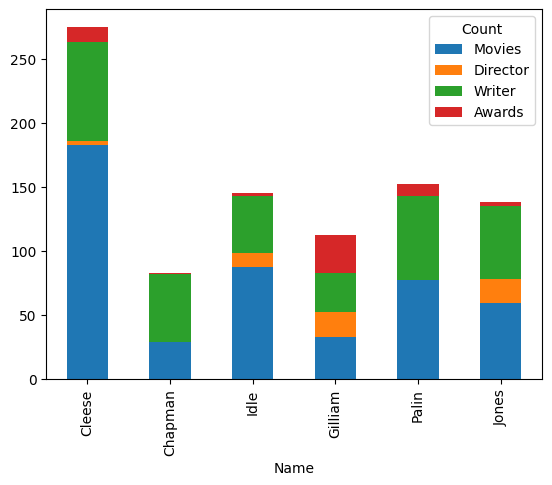

In [24]:
df.plot.bar(x="Name", stacked=True)  # a stacked bar chart

### Create multiple <font color="green">**subplots**</font>  in a single <font color="green">**figure**</font> 

In addition to creating single plot <font color="green">**figures**</font>, you can also have multiple `subplots` in a single <font color="green">**figure**</font>, if you want to depict each column in its own plot.

You can specify this using the `subplots` parameter.
But this is dependent on the `kind` of plot you are using, it should be applicable to single columns. For example `scatter` would instead be a relational plot (i.e. it depicts the relation between two columns) so that will not work.

array([<Axes: xlabel='Actor'>, <Axes: xlabel='Actor'>,
       <Axes: xlabel='Actor'>, <Axes: xlabel='Actor'>], dtype=object)

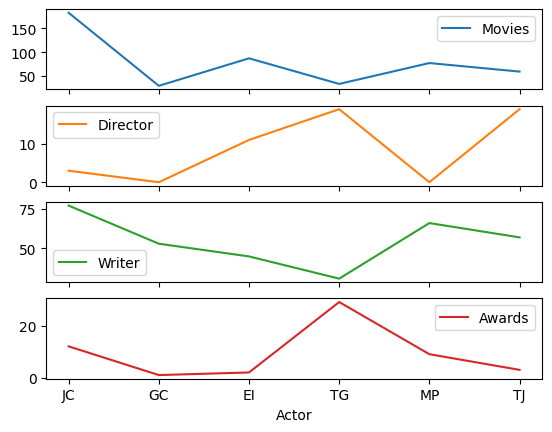

In [25]:
# plot subplots 
df.plot(subplots=True)

array([<Axes: xlabel='Actor'>, <Axes: xlabel='Actor'>,
       <Axes: xlabel='Actor'>, <Axes: xlabel='Actor'>], dtype=object)

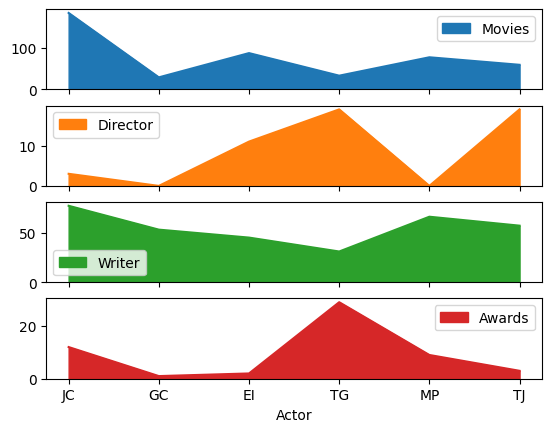

In [26]:
# plot the area as subplots 
df.plot.area(subplots=True)

You can also use additional interfaces for some plot types, that automatically plot different columns as <font color="green">**subplots**</font> , for example **`DataFrame.hist()`**.

array([[<Axes: title={'center': 'Movies'}>,
        <Axes: title={'center': 'Director'}>],
       [<Axes: title={'center': 'Writer'}>,
        <Axes: title={'center': 'Awards'}>]], dtype=object)

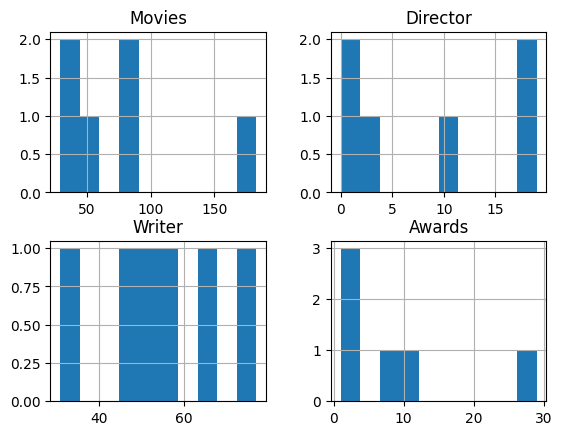

In [27]:
# plot the columns as histograms with subplots 
df.hist()

For some kind of plot, you can also trigger a subplot grouping with the parameter `by`. This tells <font color="green">**pandas**</font> `by` which column it should group the data.

In [28]:
df_melted.head()

,Name,Count,value
0,Cleese,Movies,183.0
1,Chapman,Movies,29.0
2,Idle,Movies,87.0
3,Gilliam,Movies,33.0
4,Palin,Movies,77.0


array([[<Axes: title={'center': 'Awards'}>,
        <Axes: title={'center': 'Director'}>],
       [<Axes: title={'center': 'Movies'}>,
        <Axes: title={'center': 'Writer'}>]], dtype=object)

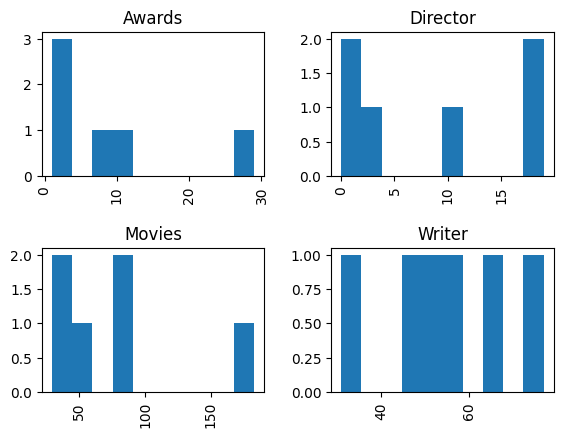

In [31]:
# group by the values in the "Count" column
df_melted.hist(by="Count")

array([[<Axes: title={'center': 'Awards'}, xlabel='[Country]'>,
        <Axes: title={'center': 'Director'}, xlabel='[Country]'>],
       [<Axes: title={'center': 'Movies'}, xlabel='[Country]'>,
        <Axes: title={'center': 'Writer'}, xlabel='[Country]'>]],
      dtype=object)

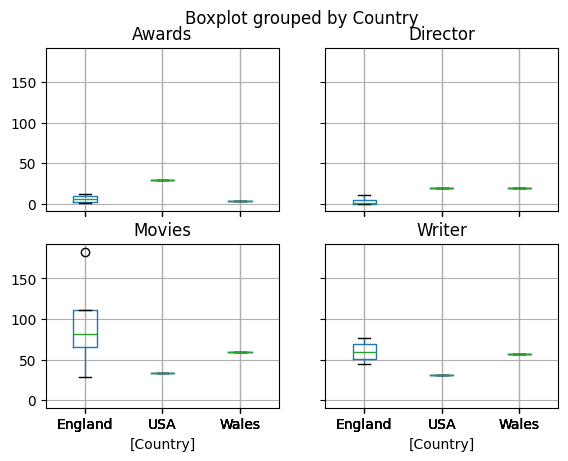

In [32]:
# group boxplots by "Country"
myframe[["Awards", "Director", "Movies", "Writer", "Country"]].boxplot(by="Country")

### Customizing figures

As we have seen, different `kind` of plots need (obviously) different informations and have different customization options.\
Also, different plots need (obviously) different informations and have different customization options.


<Axes: xlabel='Actor'>

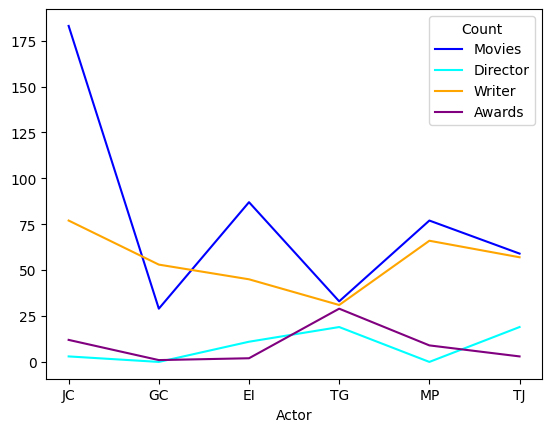

In [33]:
# color
df.plot(color=["blue", "cyan", "orange", "purple"])

<Axes: xlabel='Actor'>

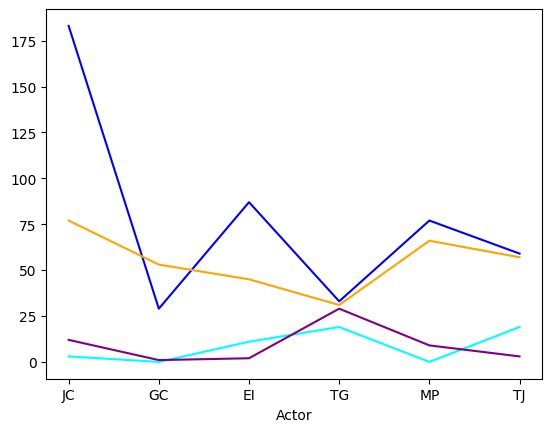

In [34]:
# legend
df.plot(color=["blue", "cyan", "orange", "purple"], legend=False)

<Axes: xlabel='Actor'>

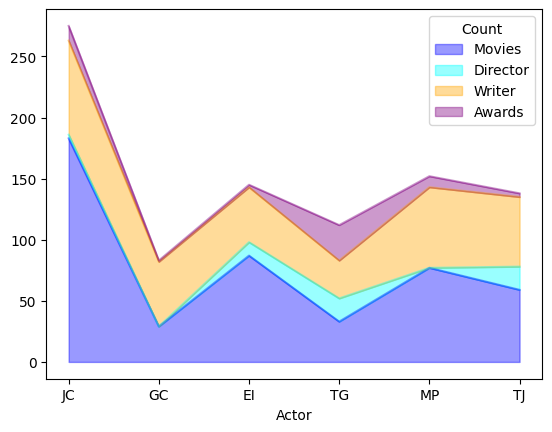

In [35]:
# alpha
df.plot(kind="area", color=["blue", "cyan", "orange", "purple"], alpha=.4)

<Axes: xlabel='Actor'>

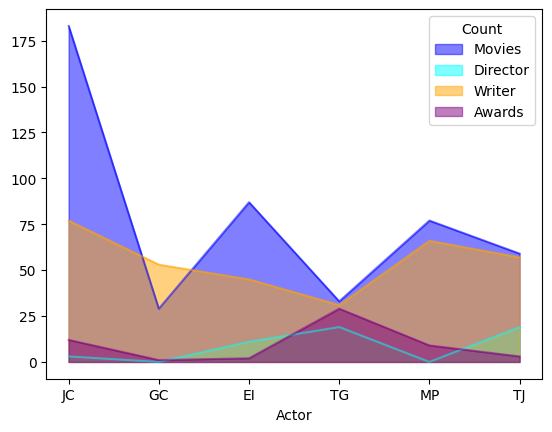

In [36]:
# stacked is only a useful parameter for plots that can be stacked!
df.plot(color=["blue", "cyan", "orange", "purple"], kind="area", stacked=False)

<Axes: ylabel='Frequency'>

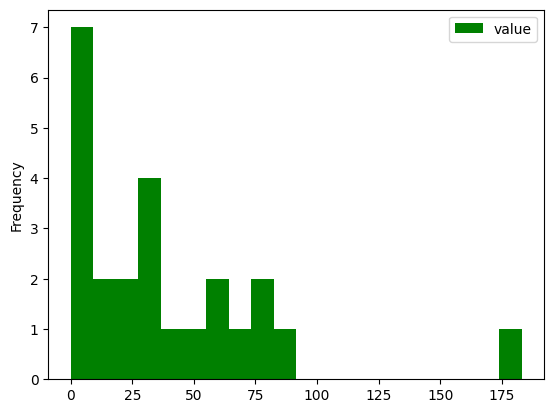

In [37]:
# bins
df_melted.plot.hist(color="green", bins=20)

<Axes: ylabel='Frequency'>

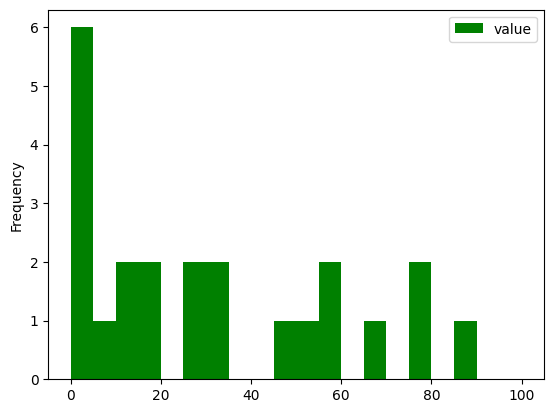

In [ ]:
# bins
df_melted.plot.hist(color="green", bins=20, range=(0, 100))

Depending on the `kind` of plot you are doing, the <font color="green">**method**</font>  you call will take additional <font color="green">**parameters**</font> .
You can tweak the plot in a huge variety of different ways via these additional keywords and the possibilities are too numerous to go through every example here. 

If you don't use the **`plot()`** convenience <font color="green">**function**</font>  but the underlying `.plot.*` <font color="green">**methods**</font>, there might be additional
parameter you can pass to the <font color="green">**function**</font> .

Keep in mind that **`plot()`** and all the `.plot.*` <font color="green">**methods**</font> are applicable to both <font color="green">**DataFrame**</font> and <font color="green">**Series**</font>.

Remember that every <font color="green">**figure**</font>  created by <font color="green">**pandas**</font> is a maplotlib object.
So usually, the parameter you can pass are the specific <font color="green">**parameters**</font>  of the underlying <font color="green">**matplotlib**</font> <font color="green">**function**</font>.
In fact, <font color="green">**pandas**</font> does nothing else than call the appropriate <font color="green">**matplotlib**</font> <font color="green">**function**</font>  and pass
your arguments directly to that <font color="green">**function**</font> .

So, once you've seen the options available in <font color="green">**matplotlib**</font>, you get a pretty good idea what keyword arguments will work with <font color="green">**pandas**</font>.

This package will be topic of our next session, and the options you will encounter there will, at least to some extend
work with <font color="green">**pandas**</font>.

## Summary

Now you should know:

- How to quickly inspect your data visually
- How to create different plots and <font color="green">**figure**</font> s using <font color="green">**pandas**</font> as interface

## Exercise 1

a) Load the cleaned genes dataset you have prepared in the last exercise. Plot a histogram of the log2 fold changes.

b) Make it look nicer: change the color, number of bins and hide the legend.

## Exercise 2

Create scatter plots comparing all TPM columns with one another. Do you see a correlation?

## Exercise 3

a) Create a figure showing the distribution of all TPM columns in a single (subplot) figure using a single line of code. 

b) Adjust the plots appropriately, so that extreme values are not included.

## Exercise 4

A volcano plot is a scatter plot showing the log2 fold changes versus the negative log10 of the p-values.\
Create such a volcano plot. Do not worry about additional lines or colors yet.

## Exercise 5

Create a pie chart depicting the number of occurences of each biotype in the genes table.